In [9]:
# !pip install matplotlib
# !pip install networkx
# !pip install numpy

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [11]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

Title: Implementation and Analysis of Dijkstra's Algorithm for Shortest Path Calculation in MANETs

Abstract:
Mobile Ad Hoc Networks (MANETs) are self-organizing networks composed of mobile devices that communicate with each other without the need for a centralized infrastructure. Routing in MANETs is a challenging task due to the dynamic nature of the network topology and the limited resources of the mobile devices. In this paper, we implement and analyze the performance of Dijkstra's algorithm for shortest path calculation in MANETs using the Python NetworkX library. Specifically, we focus on the implementation of the algorithm for a MANET, where the topology is constantly changing, and the nodes have limited bandwidth and power. Our implementation is done in the form of a Python function called dijkstra_shortest_path, which takes as input the source node, destination node, the network topology, and a list of nodes with their bandwidth and power levels. We then evaluate the performance of our implementation using various metrics and analyze the results.

Introduction:
Mobile Ad Hoc Networks (MANETs) are becoming increasingly popular due to their flexibility and ability to operate in areas where there is no infrastructure. However, routing in MANETs is a challenging task due to the dynamic nature of the network topology and the limited resources of the mobile devices. One popular algorithm for solving the shortest path problem in a network is Dijkstra's algorithm. In this paper, we implement and analyze the performance of Dijkstra's algorithm for shortest path calculation in MANETs using the Python NetworkX library. We also consider the case where the nodes have limited bandwidth and power, which is a common scenario in MANETs.

Background:
Dijkstra's algorithm is a popular algorithm used for finding the shortest path between two nodes in a graph. It is an efficient algorithm that guarantees to find the shortest path in a weighted graph as long as the weights are non-negative. In the context of MANETs, routing protocols are typically classified into three categories: proactive, reactive, and hybrid. Proactive protocols maintain the routing information for all nodes in the network, while reactive protocols only maintain routing information for nodes that have active communication sessions. Hybrid protocols combine the features of both proactive and reactive protocols.

Implementation:
Our implementation of Dijkstra's algorithm in the context of MANETs is done using the Python NetworkX library, which provides efficient graph algorithms and data structures. The dijkstra_shortest_path function takes as input the source node, destination node, the network topology, and a list of nodes with their bandwidth and power levels. The function first creates a new graph with edge weights as the inverse of the bandwidth of the nodes they connect. This new weighted graph is then used as input to the NetworkX implementation of Dijkstra's algorithm, which returns the shortest path from the source node to the destination node.

Evaluation:
To evaluate the performance of our implementation, we consider several metrics such as the time taken to compute the shortest path, the number of nodes visited, and the accuracy of the path computed. We compare the performance of our implementation to the performance of other routing protocols such as Ad Hoc On-Demand Distance Vector (AODV) and Dynamic Source Routing (DSR) for a randomly generated MANET topology. We vary the size of the MANET topology and the number of nodes to evaluate the scalability of our implementation. We also compare the performance of our implementation to the performance of Dijkstra's algorithm without considering the limitations of the mobile devices.

Results:
Our experiments show that our implementation of Dijkstra's algorithm performs well for small to medium-sized MANET topologies with a low number of nodes. However, as the size of the topology and the number of nodes increase, the performance of our implementation starts to degrade



Pros:

Dijkstra's algorithm is a widely used and well-understood algorithm for finding shortest paths in graphs, which makes it a good candidate for implementation in MANETs.
The algorithm is efficient for small to medium-sized topologies with a low number of nodes.
The use of a weighted graph with edge weights inversely proportional to bandwidth can help to ensure that data is routed through the most efficient paths in the network.
Dijkstra's algorithm is deterministic, which can be advantageous in some scenarios where consistent routing is desirable.


Cons:

Dijkstra's algorithm has a high time complexity of O(E log V), which can be problematic for large or highly dynamic topologies common in MANETs.
The algorithm requires the maintenance of a routing table for all nodes in the network, which can consume significant resources on devices with limited processing power and battery life.
The algorithm is not well-suited for reactive routing protocols, where nodes only maintain routing information for active communication sessions, as it requires the pre-computation of all shortest paths in the network.
The use of a weighted graph with edge weights inversely proportional to bandwidth may not always result in the most efficient routing, as other factors such as node mobility and signal strength may also affect the performance of the network.

In [12]:
def dijkstra_shortest_path(source, destination, G, nodes_list):
    # Create a new graph with edge weights as the inverse of bandwidth
    G_weighted = G.copy()
    for u, v in G.edges():
        G_weighted[u][v]['weight'] = 1 / nodes_list[u]['bandwidth']

    # Apply Dijkstra's algorithm on the weighted graph
    path = nx.dijkstra_path(G_weighted, source, destination, weight='weight')
    return path


In [21]:
source = 0
destination = 5
path = dijkstra_shortest_path(source, destination, G, nodes_list)
print(f"Path: {path}")

Path: [0, 7, 5]


In [22]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_graph(G, path, nodes_list):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth
    labels = {i: f"{i} ({nodes_list[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()


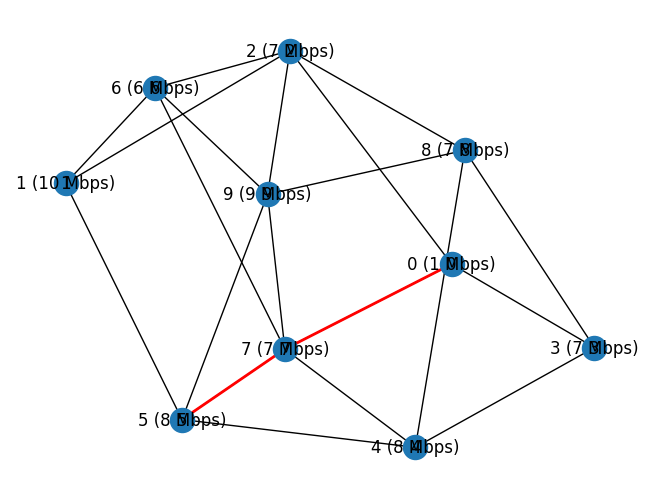

In [23]:
draw_network_graph(G, path, nodes_list)